In [1]:
##Exercise 4

#(a)

import psycopg2
import wrds
import numpy as np
import matplotlib.pyplot as plt

db=wrds.Connection(wrds_username='zimushko')
#db.create_pgpass_file()

Loading library list...
Done


In [2]:
#(b) 
import pandas as pd

#getting data from wrds
apple=db.raw_sql("select date, ret " "from crsp.dsf " "where permco in (7) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")
gs=db.raw_sql("select date, ret " "from crsp.dsf " "where permco in (35048) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")
msft=db.raw_sql("select date, ret " "from crsp.dsf " "where permco in (8048) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")
pg=db.raw_sql("select  date, ret " "from crsp.dsf " "where permco in (21446) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")
ge=db.raw_sql("select date, ret " "from crsp.dsf " "where permco in (20792) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")

#rename the columns
apple=apple.rename(index=apple["date"], columns={"ret": "Apple"})
gs=gs.rename(index=gs["date"], columns={"ret": "GS"})
msft=msft.rename(index=msft["date"], columns={"ret": "Msft"})
pg=pg.rename(index=pg["date"], columns={"ret": "PG"})
ge=ge.rename(index=pg["date"], columns={"ret": "GE"})

#merge into one table
df1=pd.merge(apple, gs, on='date')
df2=pd.merge(df1, msft, on='date')
df3=pd.merge(df2, pg, on='date')
S=pd.merge(df3, ge, on='date')

In [3]:
#(c) 
S.to_csv('returns.csv', sep=';', index=False)

In [4]:
#(d) 
S = pd.read_csv('returns.csv', sep=';') 

In [5]:
#(e)

#changing the date format
S['date']=pd.to_datetime(S['date'], format='%Y-%m-%d')
S=S.set_index('date')

#obtaining gross cummulative returns 
S=S+1
S=S.cumprod()

#obtaining daily, weekly and monthly log returns
dailylogret = np.log(S).diff() 
S1=S.resample('M').mean()
S2=S.resample('W').mean()
monthlylogret=np.log(S1).diff() 
weeklylogret=np.log(S2).diff()

In [6]:
#Summary statistics
dailylogret.describe()

,Apple,GS,Msft,PG,GE
count,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000
mean,0.001264,0.000240,0.000552,0.000359,-0.000156
std,0.023162,0.022619,0.018262,0.011856,0.021009
min,-0.197470,-0.210223,-0.159453,-0.091428,-0.164394
25%,-0.009673,-0.009835,-0.007784,-0.005021,-0.008495
50%,0.000950,0.000340,0.000380,0.000371,0.000000
75%,0.012616,0.010666,0.008924,0.005960,0.008370
max,0.130194,0.234818,0.170626,0.113409,0.179844


In [7]:
monthlylogret.describe()

,Apple,GS,Msft,PG,GE
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,0.025546,0.004321,0.010483,0.007878,-0.003504
std,0.084124,0.075273,0.054155,0.036706,0.081755
min,-0.355325,-0.433700,-0.169398,-0.131571,-0.415514
25%,-0.016301,-0.036654,-0.025786,-0.012120,-0.033191
50%,0.023430,0.009410,0.014344,0.009646,0.001518
75%,0.082935,0.049729,0.042826,0.030314,0.034619
max,0.258722,0.221748,0.138582,0.098064,0.275806


In [8]:
weeklylogret.describe()

,Apple,GS,Msft,PG,GE
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.006032,0.001062,0.002585,0.001772,-0.000827
std,0.039617,0.037848,0.029074,0.018047,0.038455
min,-0.208193,-0.253874,-0.133643,-0.086491,-0.262730
25%,-0.016929,-0.017904,-0.011583,-0.007773,-0.015653
50%,0.008095,0.002643,0.003254,0.002599,-0.000901
75%,0.029927,0.022210,0.018547,0.012268,0.017073
max,0.210120,0.256543,0.125712,0.087459,0.227361


In [9]:
print('Annualized estimated mean daily log-return', dailylogret.mean()*252)

Annualized estimated mean daily log-return Apple    0.318647
GS       0.060402
Msft     0.139111
PG       0.090586
GE      -0.039333
dtype: float64


In [10]:
print('Annualized estimated mean weakly log-return ', weeklylogret.mean()*52)

Annualized estimated mean weakly log-return  Apple    0.313668
GS       0.055236
Msft     0.134427
PG       0.092147
GE      -0.043009
dtype: float64


In [11]:
print('Annualized estimated mean monthly log-return ', monthlylogret.mean()*12)

Annualized estimated mean monthly log-return  Apple    0.306551
GS       0.051857
Msft     0.125798
PG       0.094541
GE      -0.042046
dtype: float64


In [12]:
print('Annualized std deviation of daily log returns', np.std(dailylogret)*np.sqrt(252))

Annualized std deviation of daily log returns Apple    0.367651
GS       0.359035
Msft     0.289865
PG       0.188197
GE       0.333480
dtype: float64


In [13]:
print('Annualized std deviation of weekly log returns', np.std(weeklylogret)*np.sqrt(52))

Annualized std deviation of weekly log returns Apple    0.285545
GS       0.272793
Msft     0.209559
PG       0.130073
GE       0.277167
dtype: float64


In [14]:
print('Annualized std deviation of monthly log returns', np.std(monthlylogret)*np.sqrt(12))

Annualized std deviation of monthly log returns Apple    0.290803
GS       0.260206
Msft     0.187205
PG       0.126888
GE       0.282613
dtype: float64


Text(0.5, 1.0, 'Moving average for monthly returns')

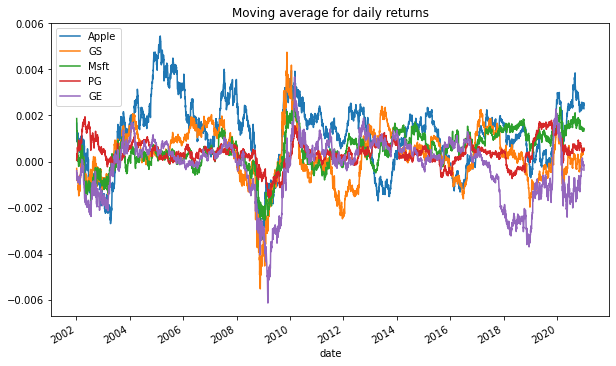

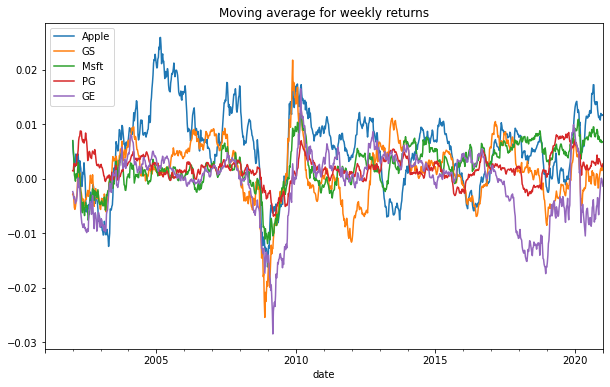

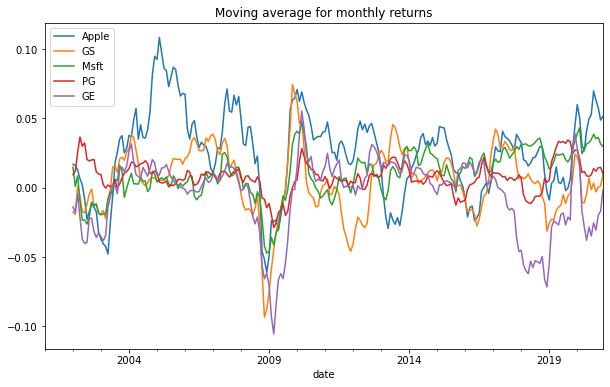

In [15]:
#Plotting the moving average of returns
dailylogret.rolling(window =252).mean().plot(figsize=(10,6))
plt.title('Moving average for daily returns')
weeklylogret.rolling(window =52).mean().plot(figsize=(10,6))
plt.title('Moving average for weekly returns')
monthlylogret.rolling(window =12).mean().plot(figsize=(10,6))
plt.title('Moving average for monthly returns')

Text(0.5, 1.0, 'Time-series of the std deviation of monthly logreturns estimated using a rolling one-year window')

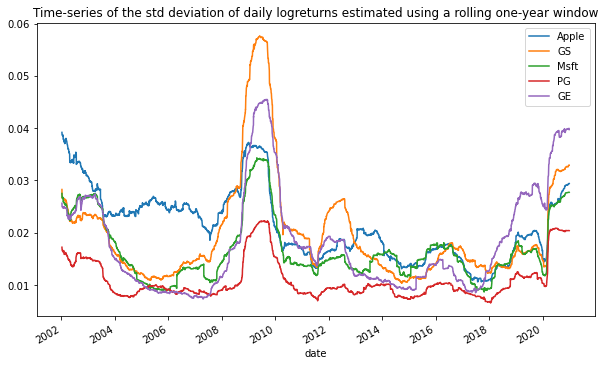

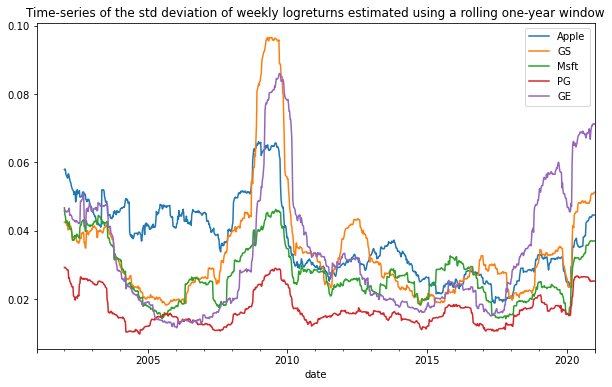

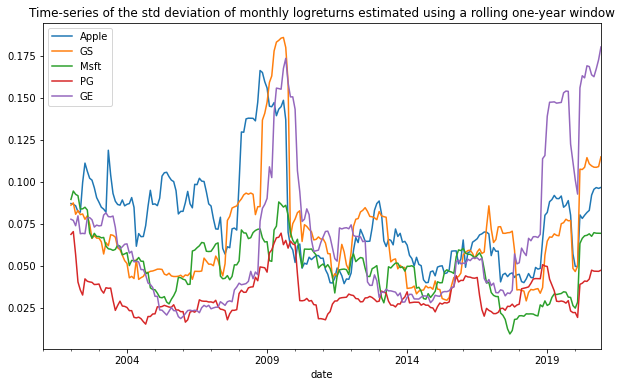

In [17]:
#Plotting the time-series of the std deviation of logreturns estimated using a rolling one-year window
dailylogret.rolling(window = 252).std().plot(figsize=(10,6))
plt.title('Time-series of the std deviation of daily logreturns estimated using a rolling one-year window')
weeklylogret.rolling(window = 52).std().plot(figsize=(10,6))
plt.title('Time-series of the std deviation of weekly logreturns estimated using a rolling one-year window')
monthlylogret.rolling(window = 12).std().plot(figsize=(10,6))
plt.title('Time-series of the std deviation of monthly logreturns estimated using a rolling one-year window')